In [525]:
import pandas as pd
import numpy as np
import pandas_datareader.data as wb
import matplotlib.pyplot as plt
import string
import warnings
warnings.filterwarnings('ignore')
import requests

#Obtendo e Tratando dados

In [526]:
carteira = 1111
acao_codigo = 'SUZB3'
mm1 = ('MM20', 13)
mm2 = ('MM200', 200)
var = 20
dados = pd.DataFrame()
dados[acao_codigo] = wb.get_data_yahoo(acao_codigo+'.SA', start=2017)['Adj Close']
dados

,SUZB3
Date,
2017-01-02,19.289434
2017-01-03,19.289434
2017-01-04,19.289434
2017-01-05,19.289434
2017-01-06,19.289434
...,...
2020-12-21,55.220001
2020-12-22,57.680000
2020-12-23,56.369999


In [527]:
dados[mm1[0]] = dados[acao_codigo].rolling(mm1[1]).mean()
dados[mm2[0]] = dados[acao_codigo].rolling(mm2[1]).mean()
dados = dados.dropna()
print(dados)

                SUZB3       MM20      MM200
Date                                       
2017-10-16  19.289434  19.289434  19.289434
2017-10-17  19.289434  19.289434  19.289434
2017-10-18  19.289434  19.289434  19.289434
2017-10-19  19.289434  19.289434  19.289434
2017-10-20  19.289434  19.289434  19.289434
...               ...        ...        ...
2020-12-21  55.220001  53.127692  43.744900
2020-12-22  57.680000  53.566154  43.820200
2020-12-23  56.369999  53.850000  43.901900
2020-12-28  57.150002  54.188461  43.997900
2020-12-29  57.209999  54.525384  44.089650

[793 rows x 3 columns]


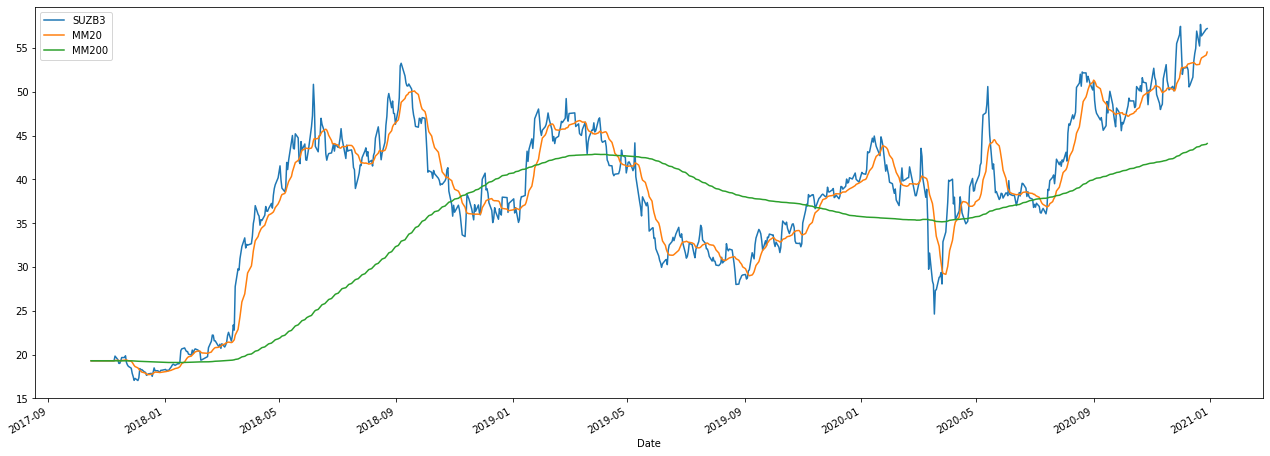

In [528]:
dados.plot(figsize=(22,8), label=acao_codigo)
plt.show()

In [529]:
def format_money(m):
    return f'R$ {m:.2f}'

In [523]:
n, lucro, h = 0, 0, 0
compra, vende = 0, 0
aporte = carteira
print(f'Carteira: {format_money(carteira)}')
stopAtivado = False
precoStopAtivado = 0
for i in dados.index:
    preco_acao = dados[acao_codigo][i]
    dia = f'{i.year}/{i.month:02}/{i.day:02}'
    # Comprando
    if dados[mm1[0]][i] >= dados[mm2[0]][i] and dados[mm1[0]][h] <= dados[mm2[0]][h] and compra == 0:
        n = int(carteira // preco_acao)
        carteira = carteira % preco_acao
        compra = preco_acao
        print(f'{dia} - Compra {n} acões à {format_money(compra)}...')
        print(f'Carteira: {format_money(carteira)}')
        stop_acao = preco_acao*(1-(var/100))
    elif stopAtivado and dados[mm1[0]][i] >= dados[mm2[0]][i] and precoStopAtivado <= preco_acao and compra == 0:
        n = int(carteira // preco_acao)
        carteira = carteira % preco_acao
        compra = preco_acao
        print(f'{dia} - Compra {n} acões à {format_money(compra)}...')
        print(f'Carteira: {format_money(carteira)}')
        stop_acao = preco_acao*(1-(var/100*2))
        stopAtivado = False

    # Vendendo
    elif compra != 0:
        menor_preco_acao = preco_acao*(1-(var/100))
        if menor_preco_acao > stop_acao:
            stop_acao = menor_preco_acao
            print(f'{dia} - Stop da açao foi para {format_money(stop_acao)}')
        elif dados[mm1[0]][i] <= dados[mm2[0]][i] and dados[mm1[0]][h] >= dados[mm2[0]][h] or preco_acao < stop_acao:
            if preco_acao < stop_acao:
                stopAtivado = True
                precoStopAtivado = preco_acao
                print(f"{'Foi stopado!':>60}")
            vende = preco_acao
            print(f'{dia} - Vende {n} ações à {format_money(vende)}...')
            luc_parcial = (vende - compra)*n
            if luc_parcial > 0:
                print(f';D Lucro de: {format_money(luc_parcial)}...\n')
            else:
                print(f':( Preju de: {format_money(luc_parcial)}...\n')
            lucro += luc_parcial
            carteira += (n*vende)
            print(f'Carteira: {format_money(carteira)}')
            compra, vende, n = 0, 0, 0
    elif dados[mm1[0]][i] <= dados[mm2[0]][i] and dados[mm1[0]][h] >= dados[mm2[0]][h]:
        stopAtivado = False
        precoStopAtivado = 9999999
    h = i

if compra != 0:
    vende = dados[acao_codigo][-1]
    print(f'{dia} - Vende {n} ações à {format_money(vende)}...')
    luc_parcial = (vende - compra)*n
    if luc_parcial > 0:
        print(f';D Lucro de: {format_money(luc_parcial)}...\n')
    else:
        print(f':( Preju de: {format_money(luc_parcial)}...\n')
    lucro += luc_parcial
    carteira += (n*vende)

print(f'Carteira: {format_money(carteira)}')
print(f'Lucro total: {format_money(lucro)}')
lucr_porc = lucro/aporte*100
print(f'Lucro de: {lucr_porc:.2f}%')

Carteira: R$ 1111.00
2017/10/16 - Compra 57 acões à R$ 19.29...
Carteira: R$ 11.50
2017/10/17 - Vende 57 ações à R$ 19.29...
:( Preju de: R$ 0.00...

Carteira: R$ 1111.00
2017/10/18 - Compra 57 acões à R$ 19.29...
Carteira: R$ 11.50
2017/10/19 - Vende 57 ações à R$ 19.29...
:( Preju de: R$ 0.00...

Carteira: R$ 1111.00
2017/10/20 - Compra 57 acões à R$ 19.29...
Carteira: R$ 11.50
2017/10/23 - Vende 57 ações à R$ 19.29...
:( Preju de: R$ 0.00...

Carteira: R$ 1111.00
2017/10/24 - Compra 57 acões à R$ 19.29...
Carteira: R$ 11.50
2017/10/25 - Vende 57 ações à R$ 19.29...
:( Preju de: R$ 0.00...

Carteira: R$ 1111.00
2017/10/26 - Compra 57 acões à R$ 19.29...
Carteira: R$ 11.50
2017/10/27 - Vende 57 ações à R$ 19.29...
:( Preju de: R$ 0.00...

Carteira: R$ 1111.00
2017/10/30 - Compra 57 acões à R$ 19.29...
Carteira: R$ 11.50
2017/10/31 - Vende 57 ações à R$ 19.29...
:( Preju de: R$ 0.00...

Carteira: R$ 1111.00
2017/11/01 - Compra 57 acões à R$ 19.29...
Carteira: R$ 11.50
2017/11/02 - Vend

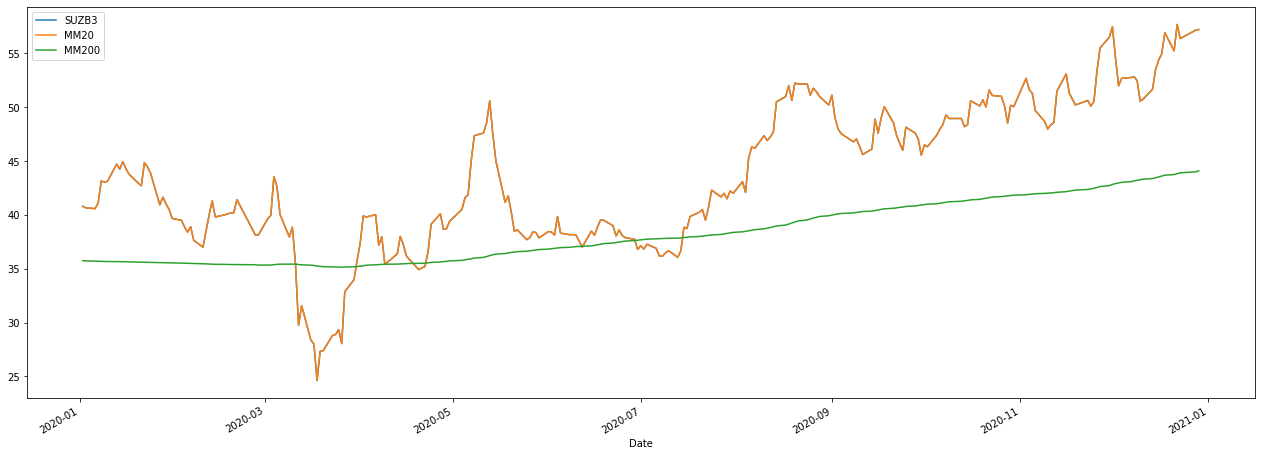

,SUZB3,MM20,MM200
Date,,,
2020-01-02,40.790001,40.790001,35.753488
2020-01-03,40.650002,40.650002,35.728256
2020-01-06,40.580002,40.580002,35.698564
2020-01-07,41.099998,41.099998,35.682040
2020-01-08,43.150002,43.150002,35.683154
...,...,...,...
2020-12-21,55.220001,55.220001,43.744900
2020-12-22,57.680000,57.680000,43.820200
2020-12-23,56.369999,56.369999,43.901900


In [524]:
dados_fatiado = dados[(dados.index.year == 2020)]
#dados_fatiado = dados_fatiado[(dados_fatiado.index.month == 3)]
dados_fatiado.plot(figsize=(22,8), label=acao_codigo)
plt.show()
dados_fatiado